In [1]:
#https://people.duke.edu/~ccc14/sta-663/ResamplingAndMonteCarloSimulations.html
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
plt.style.use('ggplot')
np.set_printoptions(formatter={'float': lambda x: '%.3f' % x})


In [2]:
#Setting the random seed
np.random.seed(123)

In [3]:
# Sampling is done with replacement by default
np.random.choice(4, 12)

array([2, 1, 2, 2, 0, 2, 2, 1, 3, 2, 3, 1])

In [4]:
# Probability weights can be given
np.random.choice(4, 12, p=[.4, .1, .1, .4])

array([3, 3, 1, 0, 0, 3, 1, 0, 0, 3, 0, 0])

In [6]:
x = np.random.randint(0, 10, (8, 12))
print(x)
print( np.size(x) )
print( x.shape )
print( x.shape[0] )
print( x.shape[1] )
print( x.ravel() )
print( sum( x.ravel() == 8 ) )

[[6 4 4 7 0 0 9 8 8 4 8 6]
 [1 6 8 7 9 1 7 1 7 9 8 7]
 [1 3 1 8 7 5 1 2 5 2 2 9]
 [3 2 6 7 9 1 3 8 3 7 9 9]
 [3 3 5 6 0 8 7 7 4 4 5 0]
 [8 9 2 5 1 5 9 2 4 3 0 3]
 [7 7 2 5 1 7 5 9 1 2 8 5]
 [0 9 3 3 3 1 7 6 3 1 7 2]]
96
(8, 12)
8
12
[6 4 4 7 0 0 9 8 8 4 8 6 1 6 8 7 9 1 7 1 7 9 8 7 1 3 1 8 7 5 1 2 5 2 2 9 3
 2 6 7 9 1 3 8 3 7 9 9 3 3 5 6 0 8 7 7 4 4 5 0 8 9 2 5 1 5 9 2 4 3 0 3 7 7
 2 5 1 7 5 9 1 2 8 5 0 9 3 3 3 1 7 6 3 1 7 2]
10


In [7]:
# sampling individual elements
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html
np.random.choice(x.ravel(), 12)
# numpy.ravel() flattens the input array, like array.reshape(-1)

array([3, 6, 0, 4, 9, 4, 3, 9, 1, 5, 3, 3])

In [8]:
# sampling rows
idx = np.random.choice(x.shape[0], 4)
x[idx, :]

array([[3, 3, 5, 6, 0, 8, 7, 7, 4, 4, 5, 0],
       [3, 2, 6, 7, 9, 1, 3, 8, 3, 7, 9, 9],
       [3, 2, 6, 7, 9, 1, 3, 8, 3, 7, 9, 9],
       [1, 6, 8, 7, 9, 1, 7, 1, 7, 9, 8, 7]])

In [9]:
# sampling columns
idx = np.random.choice(x.shape[1], 4)
x[:, idx]

array([[8, 8, 0, 8],
       [1, 7, 1, 1],
       [2, 5, 5, 2],
       [8, 3, 1, 8],
       [7, 4, 8, 7],
       [2, 4, 5, 2],
       [9, 1, 7, 9],
       [6, 3, 1, 6]])

In [ ]:
print( x )

[[7 2 4 8 0 7 9 3 4 6 1 5]
 [6 2 1 8 3 5 0 2 6 2 4 4]
 [6 3 0 6 4 7 6 7 1 5 7 9]
 [2 4 8 1 2 1 1 3 5 9 0 8]
 [1 6 3 3 5 9 7 9 2 3 3 3]
 [8 6 9 7 6 3 9 6 6 6 1 3]
 [4 3 1 0 5 8 6 8 9 1 0 3]
 [1 3 4 7 6 1 4 3 3 7 6 8]]


In [ ]:
# Shuffling occurs "in place" for efficiency in a row-wise manner
np.random.shuffle(x)
print( x )
sum( x.ravel() == 8 )

[[7 2 4 8 0 7 9 3 4 6 1 5]
 [4 3 1 0 5 8 6 8 9 1 0 3]
 [8 6 9 7 6 3 9 6 6 6 1 3]
 [2 4 8 1 2 1 1 3 5 9 0 8]
 [6 3 0 6 4 7 6 7 1 5 7 9]
 [6 2 1 8 3 5 0 2 6 2 4 4]
 [1 3 4 7 6 1 4 3 3 7 6 8]
 [1 6 3 3 5 9 7 9 2 3 3 3]]


8

In [ ]:
# To shuffle columns instead, transpose before shuffling
np.random.shuffle(x.T)
x

array([[7, 0, 4, 7, 9, 8, 1, 6, 4, 3, 2, 5],
       [8, 5, 1, 4, 6, 0, 0, 1, 9, 8, 3, 3],
       [3, 6, 9, 8, 9, 7, 1, 6, 6, 6, 6, 3],
       [1, 2, 8, 2, 1, 1, 0, 9, 5, 3, 4, 8],
       [7, 4, 0, 6, 6, 6, 7, 5, 1, 7, 3, 9],
       [5, 3, 1, 6, 0, 8, 4, 2, 6, 2, 2, 4],
       [1, 6, 4, 1, 4, 7, 6, 7, 3, 3, 3, 8],
       [9, 5, 3, 1, 7, 3, 3, 3, 2, 9, 6, 3]])

In [ ]:
print(x)
# numpy.random.permutation does the same thing but returns a copy
print( np.random.permutation(x) )
print(x)

[[7 0 4 7 9 8 1 6 4 3 2 5]
 [8 5 1 4 6 0 0 1 9 8 3 3]
 [3 6 9 8 9 7 1 6 6 6 6 3]
 [1 2 8 2 1 1 0 9 5 3 4 8]
 [7 4 0 6 6 6 7 5 1 7 3 9]
 [5 3 1 6 0 8 4 2 6 2 2 4]
 [1 6 4 1 4 7 6 7 3 3 3 8]
 [9 5 3 1 7 3 3 3 2 9 6 3]]
[[7 0 4 7 9 8 1 6 4 3 2 5]
 [1 6 4 1 4 7 6 7 3 3 3 8]
 [1 2 8 2 1 1 0 9 5 3 4 8]
 [7 4 0 6 6 6 7 5 1 7 3 9]
 [9 5 3 1 7 3 3 3 2 9 6 3]
 [3 6 9 8 9 7 1 6 6 6 6 3]
 [8 5 1 4 6 0 0 1 9 8 3 3]
 [5 3 1 6 0 8 4 2 6 2 2 4]]
[[7 0 4 7 9 8 1 6 4 3 2 5]
 [8 5 1 4 6 0 0 1 9 8 3 3]
 [3 6 9 8 9 7 1 6 6 6 6 3]
 [1 2 8 2 1 1 0 9 5 3 4 8]
 [7 4 0 6 6 6 7 5 1 7 3 9]
 [5 3 1 6 0 8 4 2 6 2 2 4]
 [1 6 4 1 4 7 6 7 3 3 3 8]
 [9 5 3 1 7 3 3 3 2 9 6 3]]


In [ ]:
# When given an integre n, permutation treats is as the array arange(n)
np.random.permutation(10)

array([4, 0, 6, 7, 5, 1, 8, 2, 3, 9])

In [ ]:
# Use indices if you needed to shuffle collections of arrays in synchrony
x = np.arange(12).reshape(4,3)
y = x + 10
idx = np.random.permutation(x.shape[0])
print(x)
print(idx)
print(x[idx, :])
print(y[idx, :])

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[3 1 2 0]
[[ 9 10 11]
 [ 3  4  5]
 [ 6  7  8]
 [ 0  1  2]]
[[19 20 21]
 [13 14 15]
 [16 17 18]
 [10 11 12]]


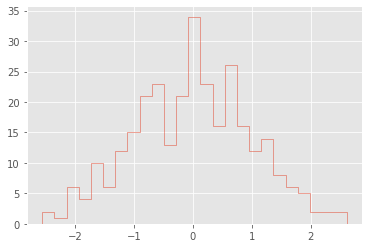

In [14]:
# For example, what is the 95% confidence interval for
# the mean of this data set if you didn't know how it was generated?

x = np.concatenate([np.random.normal(size=300)])
plt.hist(x, 25, histtype='step');

In [15]:
n = len(x)
reps = 10000
xb = np.random.choice(x, (n, reps))
print( xb.shape )
mb = xb.mean(axis=0)
mb.sort()

print( np.percentile(mb, [2.5, 97.5]) )


(300, 10000)
[-0.114 0.116]


In [16]:
import math
print( x.mean(axis=0), x.std(axis=0), math.sqrt(n) )

#https://www.geeksforgeeks.org/numpy-quantile-in-python/
import scipy.stats
z_upper = scipy.stats.norm.ppf(0.975)
print( z_upper )
z_lower = scipy.stats.norm.ppf(1-0.975)
print( z_lower  )

print('theoretical')
print( [z_lower/math.sqrt(n), z_upper/math.sqrt(n)] )

0.0014678860161940193 0.9949184828611022 17.320508075688775
1.959963984540054
-1.959963984540054
theoretical
[-0.11315857340761716, 0.11315857340761716]


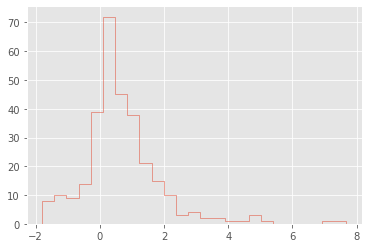

In [ ]:
# For example, what is the 95% confidence interval for
# the mean of this data set if you didn't know how it was generated?

x = np.concatenate([np.random.exponential(size=200), np.random.normal(size=100)])
plt.hist(x, 25, histtype='step');

In [ ]:
n = len(x)
reps = 10000
xb = np.random.choice(x, (n, reps))
mb = xb.mean(axis=0)
mb.sort()

np.percentile(mb, [2.5, 97.5])

array([0.537, 0.817])

In [ ]:
def f(x):
    return x * np.cos(71*x) + np.sin(13*x)

In [ ]:
# data sample for integration
n = 100
x = f(np.random.random(n))
print(x)

[0.538 0.850 -1.248 -0.601 -1.361 0.521 1.457 -0.010 0.132 -1.271 0.469
 0.409 1.031 -0.486 0.118 -0.571 -1.114 -0.002 -1.079 0.011 0.420 0.472
 -1.106 -0.934 0.948 0.222 -1.351 0.948 -0.055 -0.928 -1.407 0.145 0.021
 -1.116 0.479 -0.826 0.648 -1.246 -1.099 -0.084 0.414 0.903 -1.081 -1.045
 0.513 -1.297 0.891 1.080 0.854 -0.654 0.773 0.271 -0.754 -0.224 0.853
 -0.045 -0.041 0.573 1.463 -0.033 0.007 -0.104 0.777 0.572 0.887 -0.346
 -0.514 0.006 0.855 0.578 -1.060 0.044 -0.712 -1.549 0.892 0.867 -1.121
 -1.798 -0.057 -0.004 0.241 -0.787 -0.031 -0.791 -0.352 -0.254 -1.149
 0.851 -0.207 1.135 -0.157 -0.004 1.185 1.008 -0.109 0.626 0.171 -0.186
 -1.081 1.331]


In [ ]:
#https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.random.html
np.random.random(n)

array([0.760, 0.543, 0.864, 0.143, 0.718, 0.405, 0.219, 0.753, 0.198,
       0.726, 0.397, 0.754, 0.323, 0.908, 0.171, 0.734, 0.608, 0.661,
       0.043, 0.855, 0.743, 0.840, 0.193, 0.707, 0.668, 0.673, 0.076,
       0.694, 0.391, 0.100, 0.028, 0.245, 0.608, 0.599, 0.182, 0.682,
       0.165, 0.593, 0.817, 0.415, 0.798, 0.622, 0.330, 0.316, 0.951,
       0.049, 0.999, 0.630, 0.424, 0.436, 0.029, 0.084, 0.553, 0.892,
       0.992, 0.164, 0.055, 0.518, 0.309, 0.567, 0.368, 0.509, 0.641,
       0.115, 0.620, 0.906, 0.675, 0.648, 0.592, 0.672, 0.488, 0.042,
       0.117, 0.236, 0.324, 0.088, 0.416, 0.356, 0.738, 0.178, 0.576,
       0.578, 0.182, 0.650, 0.986, 0.841, 0.120, 0.864, 0.391, 0.714,
       0.454, 0.641, 0.707, 0.301, 0.591, 0.756, 0.677, 0.435, 0.107,
       0.342])

In [ ]:
# bootstrap MC integration
reps = 1000
xb = np.random.choice(x, (n, reps), replace=True)
print(xb)
print(xb.shape)
#print(np.arange(1, n+1))
#print(np.arange(1, n+1)[:, None].shape)
#https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html
print( np.cumsum(xb, axis=0) )
yb = 1/np.arange(1, n+1)[:, None] * np.cumsum(xb, axis=0)
upper, lower = np.percentile(yb, [2.5, 97.5], axis=1)

[[-1.045 -1.248 0.777 ... -0.352 -0.002 -0.571]
 [-0.109 -1.079 -0.157 ... -0.514 0.572 1.031]
 [0.513 0.573 0.007 ... -0.787 0.513 -0.002]
 ...
 [-0.045 0.007 -1.351 ... -0.791 -0.045 -1.121]
 [0.948 -0.352 -0.033 ... 0.271 -1.798 -0.514]
 [-0.754 -1.297 -1.106 ... 0.472 -1.081 -0.010]]
(100, 1000)
[[-1.045 -1.248 0.777 ... -0.352 -0.002 -0.571]
 [-1.154 -2.327 0.620 ... -0.866 0.570 0.461]
 [-0.641 -1.754 0.627 ... -1.653 1.082 0.458]
 ...
 [-26.176 -5.749 -15.106 ... 4.793 3.088 -2.029]
 [-25.228 -6.101 -15.139 ... 5.064 1.289 -2.544]
 [-25.982 -7.398 -16.245 ... 5.536 0.208 -2.554]]


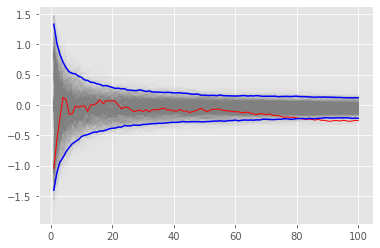

In [ ]:
plt.plot(np.arange(1, n+1)[:, None], yb, c='grey', alpha=0.02)
plt.plot(np.arange(1, n+1), yb[:, 0], c='red', linewidth=1)
plt.plot(np.arange(1, n+1), upper, 'b', np.arange(1, n+1), lower, 'b');